## 1.Import the dataset and explore basic info

In [30]:
import pandas as pd
# Load the dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)

In [31]:
# Display basic info and first few rows
basic_info = df.info()
head_data = df.head()
basic_info
head_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Data types
data_types = df.dtypes
data_types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Step 1: Dataset Loaded & Explored
##### Row: 891 Columns: 12
##### Missing values:
##### Age: 177 missing
##### Cabin: 687 missing (most)
##### Embarked: 2 missing
##### Data types:
##### Numerical: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
##### Categorical: Name, Sex, Ticket, Cabin, Embarked

## 2.Handle missing values using mean/median/imputation.

In [34]:
from sklearn.impute import SimpleImputer

# Copy of dataframe to clean
df_cleaned = df.copy()

# Impute 'Age' with median
age_imputer = SimpleImputer(strategy='median')
df_cleaned['Age'] = age_imputer.fit_transform(df_cleaned[['Age']])

In [35]:
# Drop 'Cabin' due to too many missing values
df_cleaned = df_cleaned.drop(columns=['Cabin'])

In [36]:
# Impute 'Embarked' with most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned['Embarked'] = embarked_imputer.fit_transform(df_cleaned[['Embarked']]).ravel()

In [37]:
# Confirm no missing values remain
missing_after_cleaning = df_cleaned.isnull().sum()

missing_after_cleaning

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Step 2: Missing Values Handled
##### Age: Imputed with median
##### Embarked: Imputed with most frequent value
##### Cabin: Dropped due to excessive missing values
##### No missing values remain in the dataset.

## 3.Convert categorical features into numerical using encoding.

In [38]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()
label_encoder = LabelEncoder()
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])  # male=1, female=0
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=True)
df_encoded = df_encoded.drop(columns=['Name', 'Ticket'])
df_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True


#### Step 3: Categorical Features Encoded
##### Sex: Encoded using LabelEncoder (male = 1, female = 0)
##### Embarked: One-hot encoded (Embarked_Q, Embarked_S; Embarked_C is the dropped baseline)
##### Name and Ticket columns dropped since they're not directly useful

## 4.Normalize/standardize the numerical features.

In [39]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encoded.copy()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

df_scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,2,1,1,0,0.663861,0.432793,-0.473674,0.786845,False,False
2,3,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,0,0.433312,0.432793,-0.473674,0.420730,False,True
4,5,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,False,True


## 5.Visualize outliers using boxplots and remove them

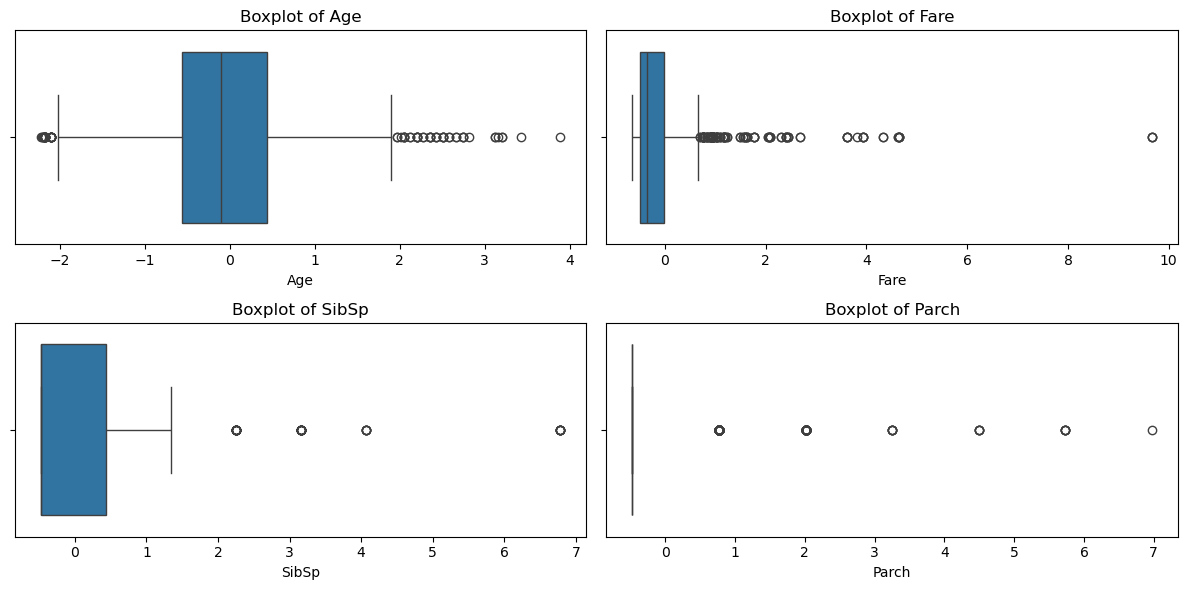

(577, 10)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_scaled[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df_no_outliers = remove_outliers_iqr(df_scaled, ['Age', 'Fare', 'SibSp', 'Parch'])

df_no_outliers.shape
